# BOOSITNG ALGORITHM

In [1]:
# installing xgboost
!pip install xgboost

In [2]:
# for data manupulation
import pandas as pd
import numpy as np

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for model building
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier


# to ignore future warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# setting parameters for graphs
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 250
%matplotlib inline

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/dhanesh-sakre/DATA-SCIENCE/refs/heads/main/Boosting%20algorithm/Wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [5]:
# descriptive statistics
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [6]:
# there is no missing values
# all the columns are numeric
# Customer_Segment is the target column

In [7]:
# checking duplicated values
df.duplicated().sum()

0

In [8]:
# checking for datatype
df.dtypes

,0
Alcohol,float64
Malic_Acid,float64
Ash,float64
Ash_Alcanity,float64
Magnesium,int64
Total_Phenols,float64
Flavanoids,float64
Nonflavanoid_Phenols,float64
Proanthocyanins,float64
Color_Intensity,float64


In [9]:
# confirming null values
df.isna().sum()

,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


In [10]:
# checking unique values present in the target column
df.Customer_Segment.unique()

array([1, 2, 3])

there are three classes in the target column

# VISUALIZATION

<Axes: xlabel='Customer_Segment', ylabel='count'>

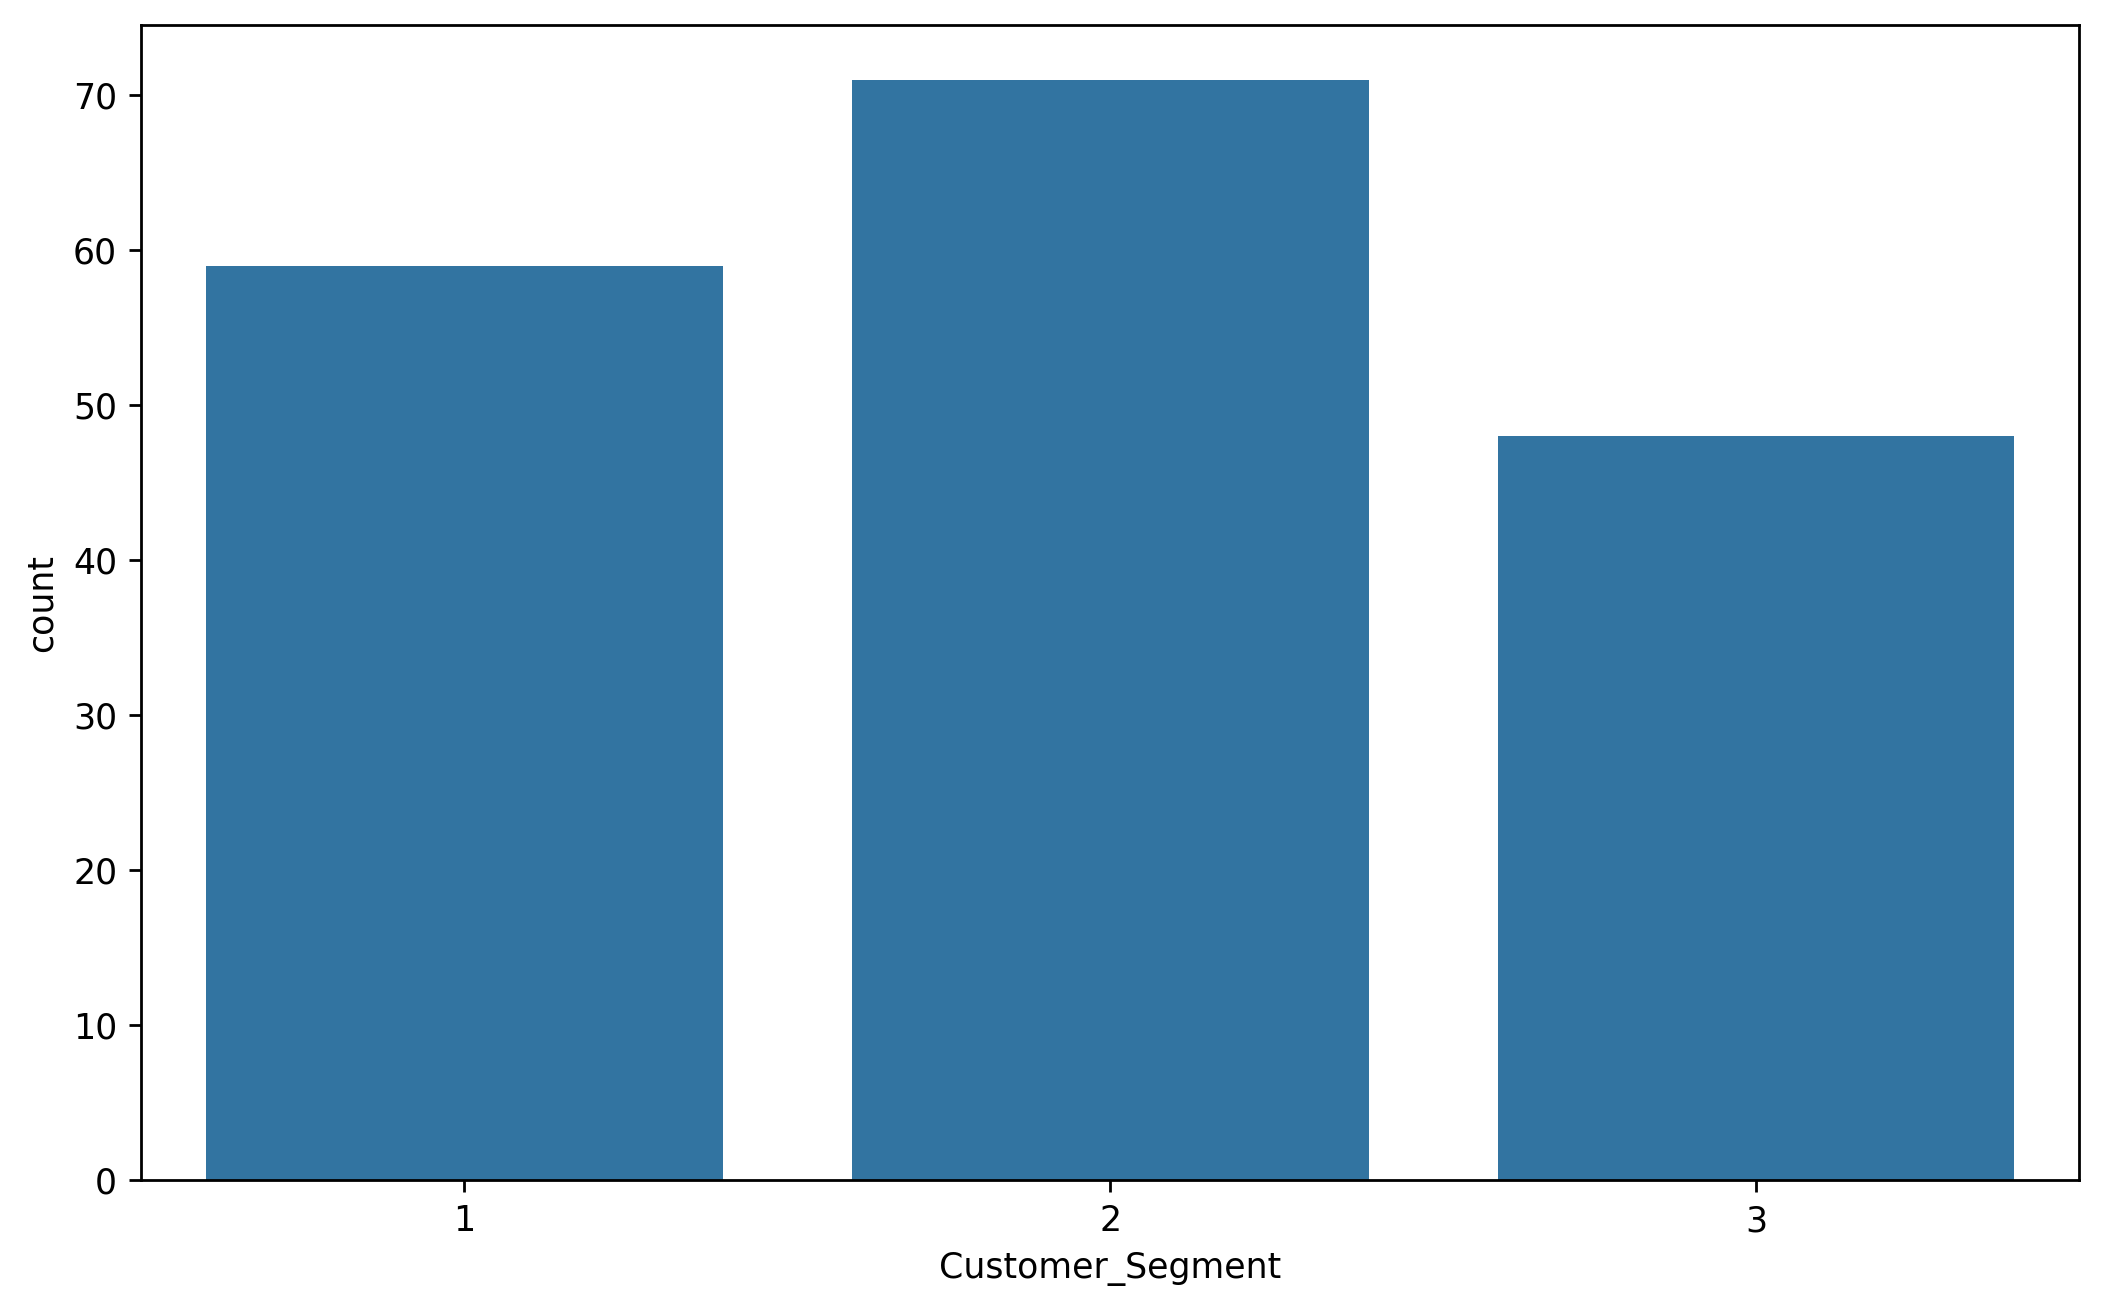

In [11]:
# distribution of target column

sns.countplot(x=df['Customer_Segment'])

In [12]:
# data is balanced

In [13]:
df.shape

(178, 14)

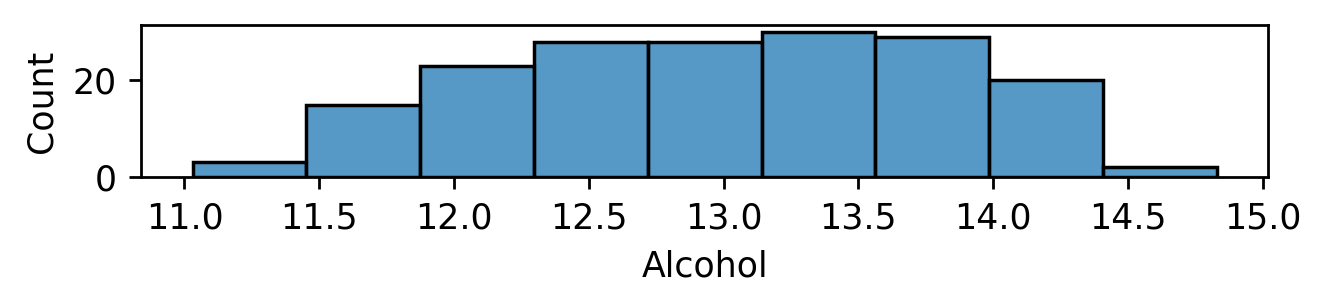

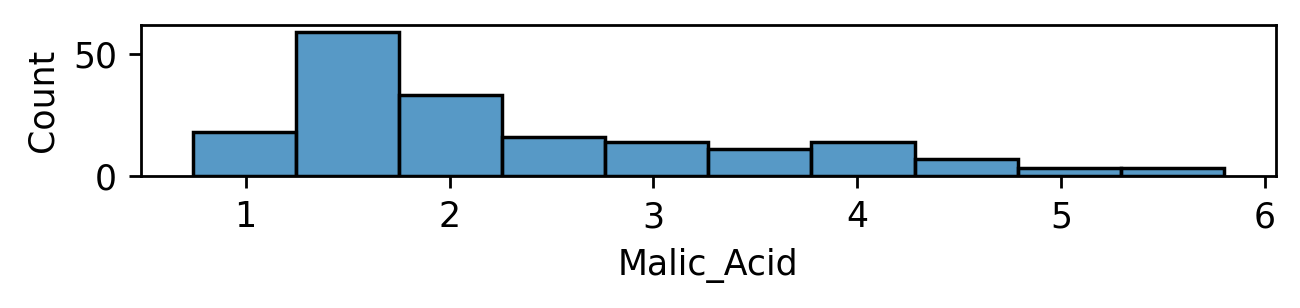

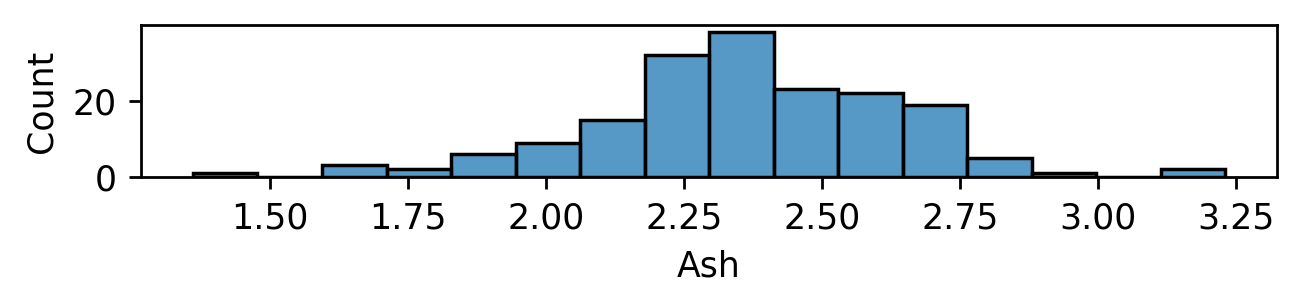

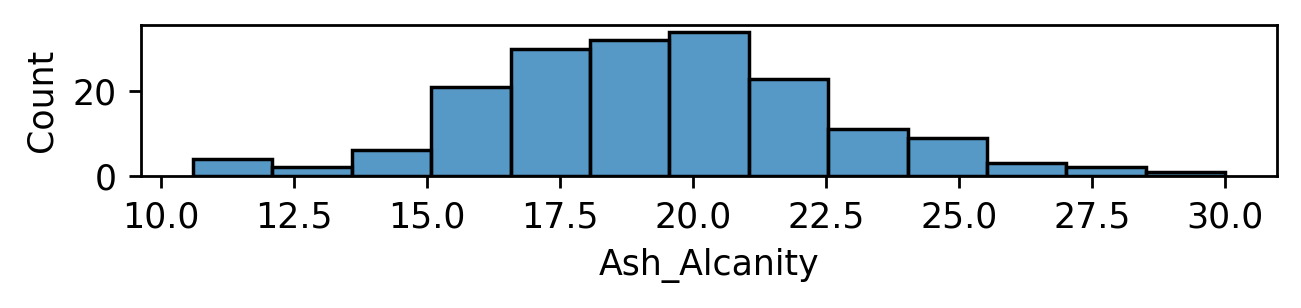

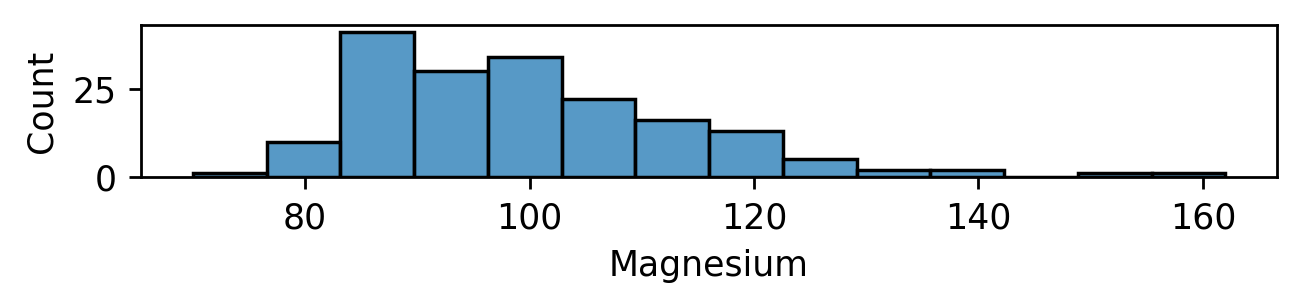

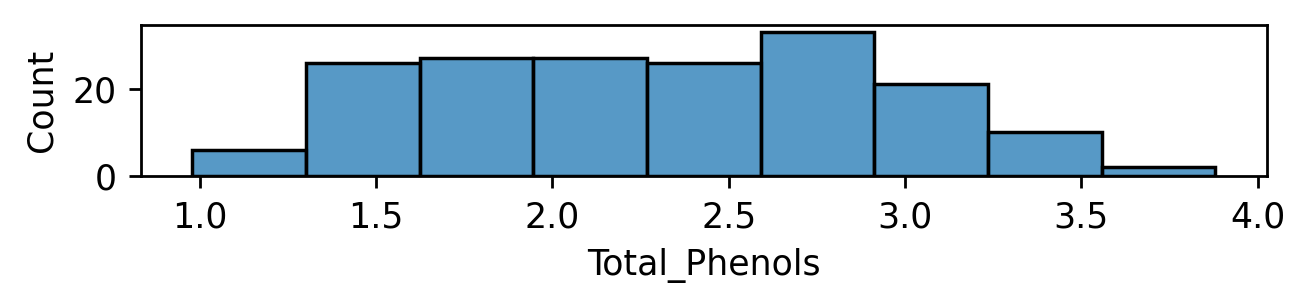

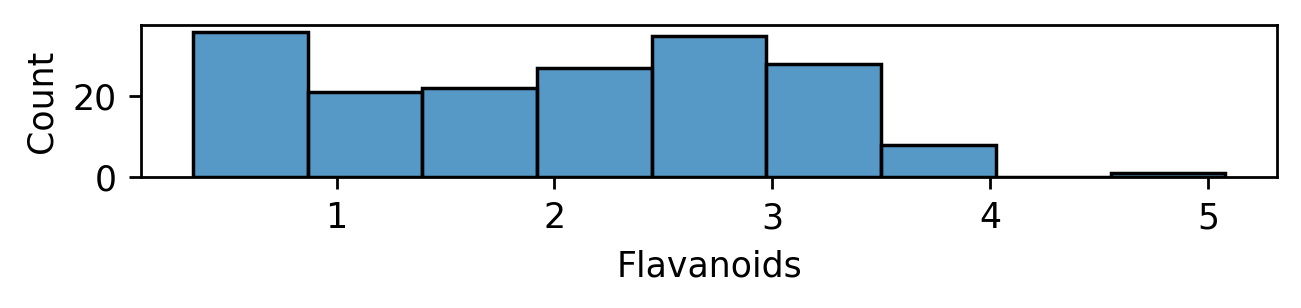

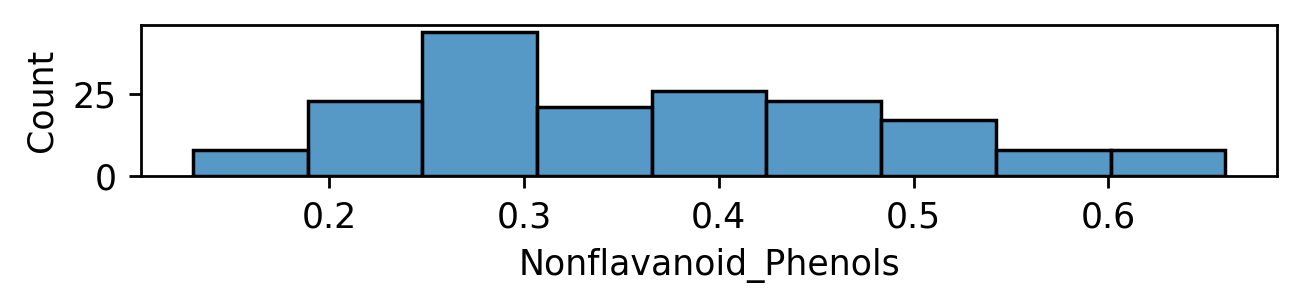

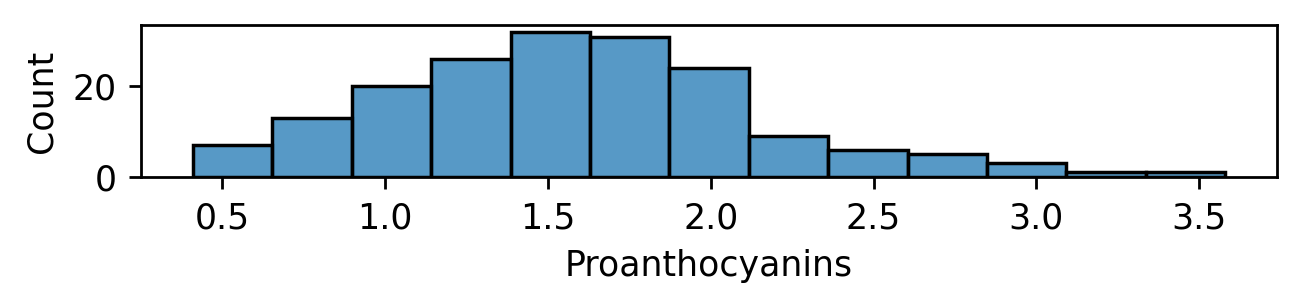

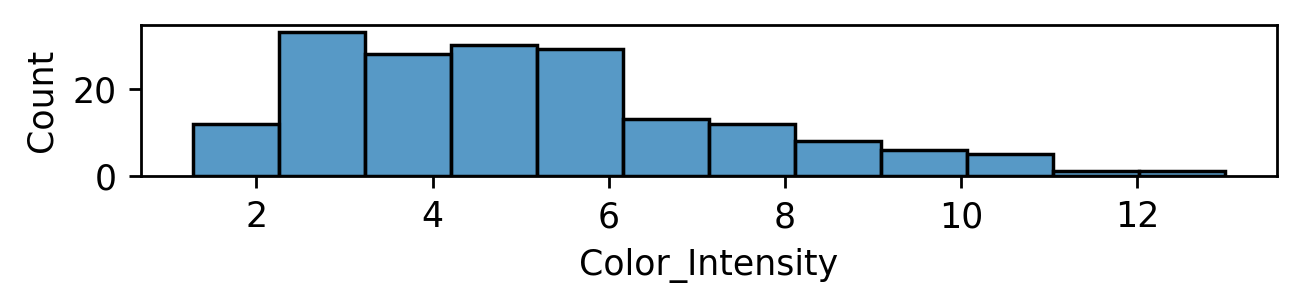

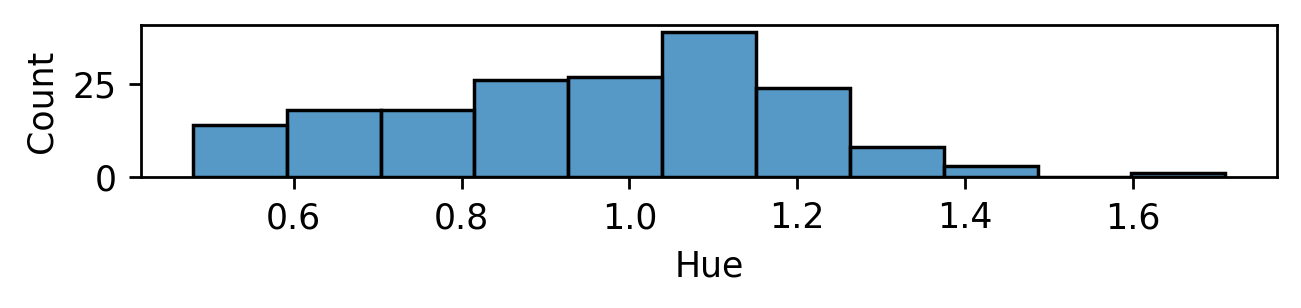

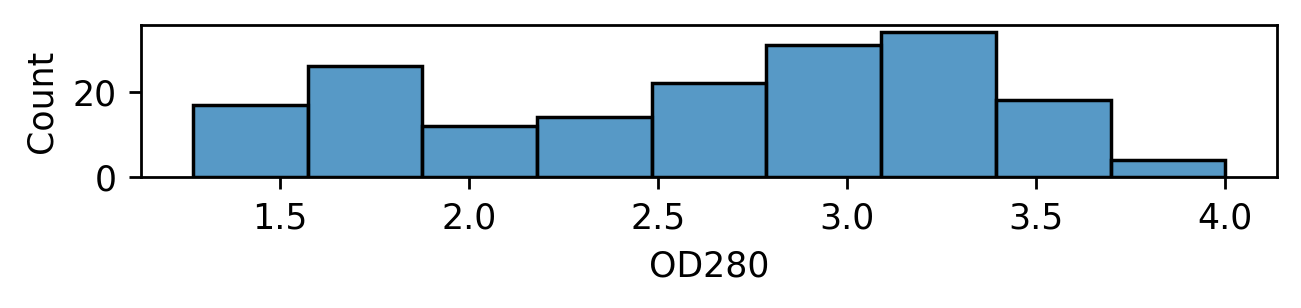

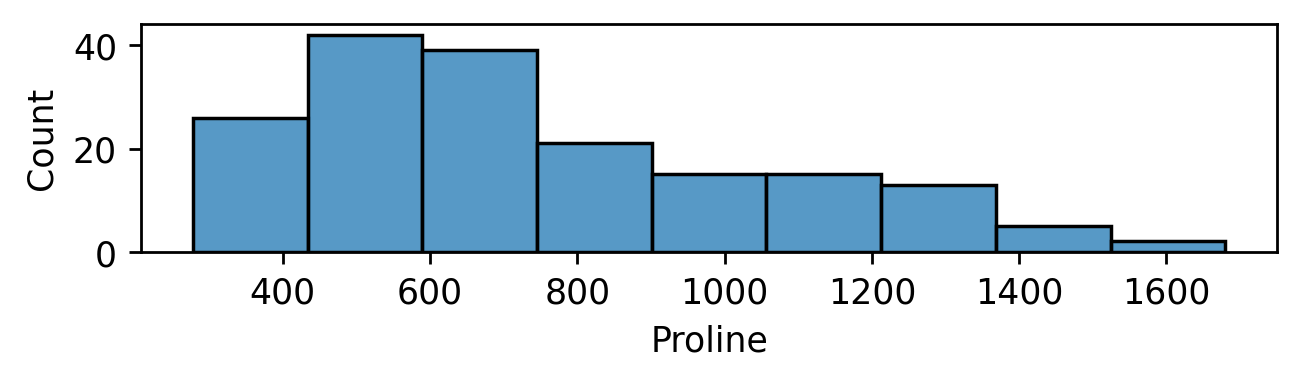

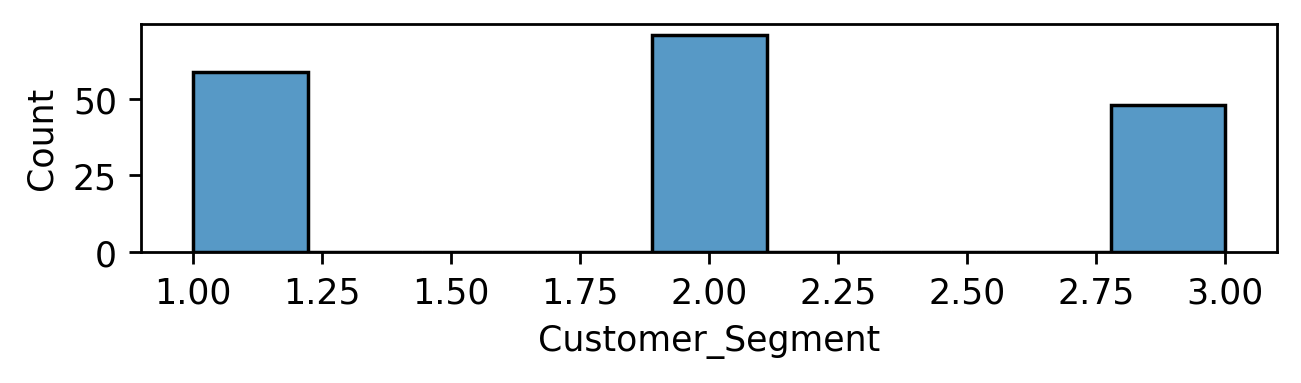

In [14]:
# distribution of other columns
col_list = df.columns

for i, col in enumerate(col_list):
    plt.rcParams['figure.figsize'] = (10, 8)
    plt.subplot(7, 2, i+1)
    sns.histplot(x=df[col])
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

In [15]:
# alchohole is almost normally distributed
# Malic_acid has positive skewness
# Ash is having some outliers at both the extreme
# Ash_Alcanity is almost nornally distributed
# Magnesium is having some outliers
# Total_Phenols is almost nornally distributed
# Nonflavanoid is having some outliers at upper extreme
# Nonflavanoid_Phenols is havig almost normal distribution
# Proanthacyanins is having positive skewness
# Color_Intenstiy is having outlier at upper extreme
# Hue is having outlier at upper extreme
# Proline has positive skewness

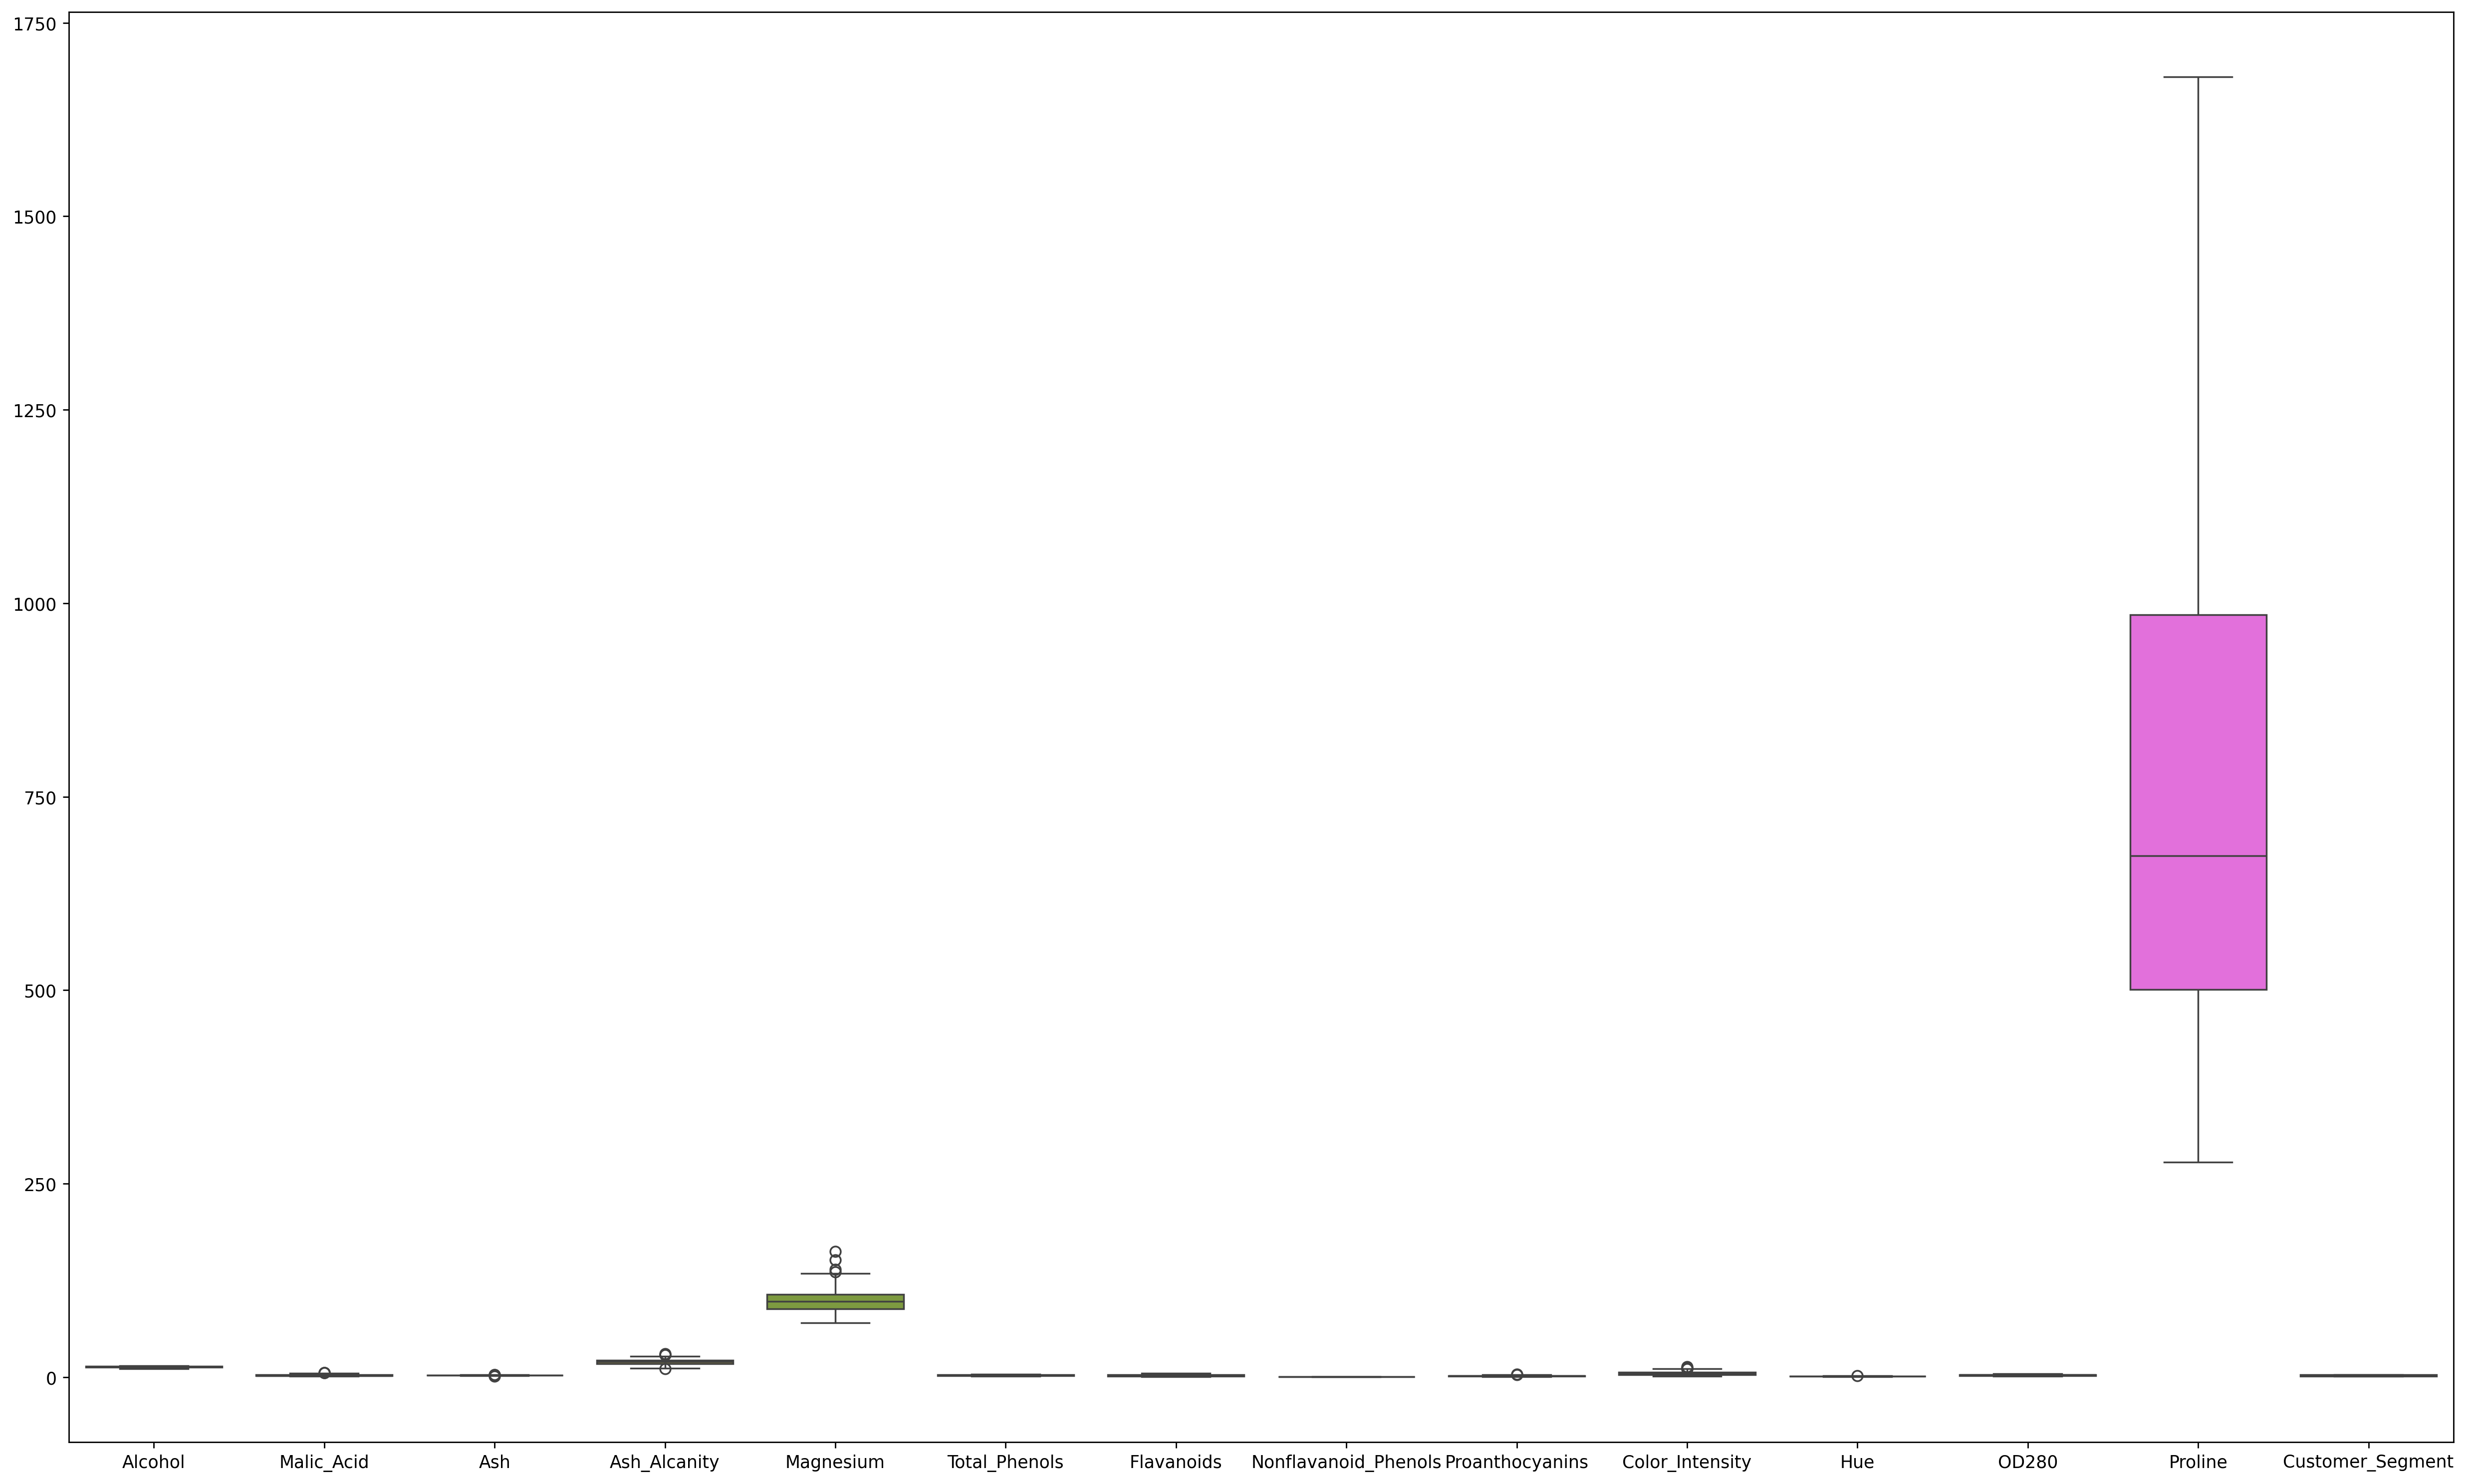

In [16]:
# confirming outliers
plt.rcParams['figure.figsize']=(20, 12)
sns.boxplot(df)
plt.tight_layout()

In [17]:
# defining function of outliers capping
def capping(data, columns):
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        IQR = q3 - q1
        lower = q1 - (1.5 * IQR)
        upper = q3 + (1.5 * IQR)
        data[col] = np.where(data[col] > upper, upper, np.where(data[col] < lower, lower, data[col]))           #capping outliers

In [18]:
# capping the outliers
capping(df, df.columns)

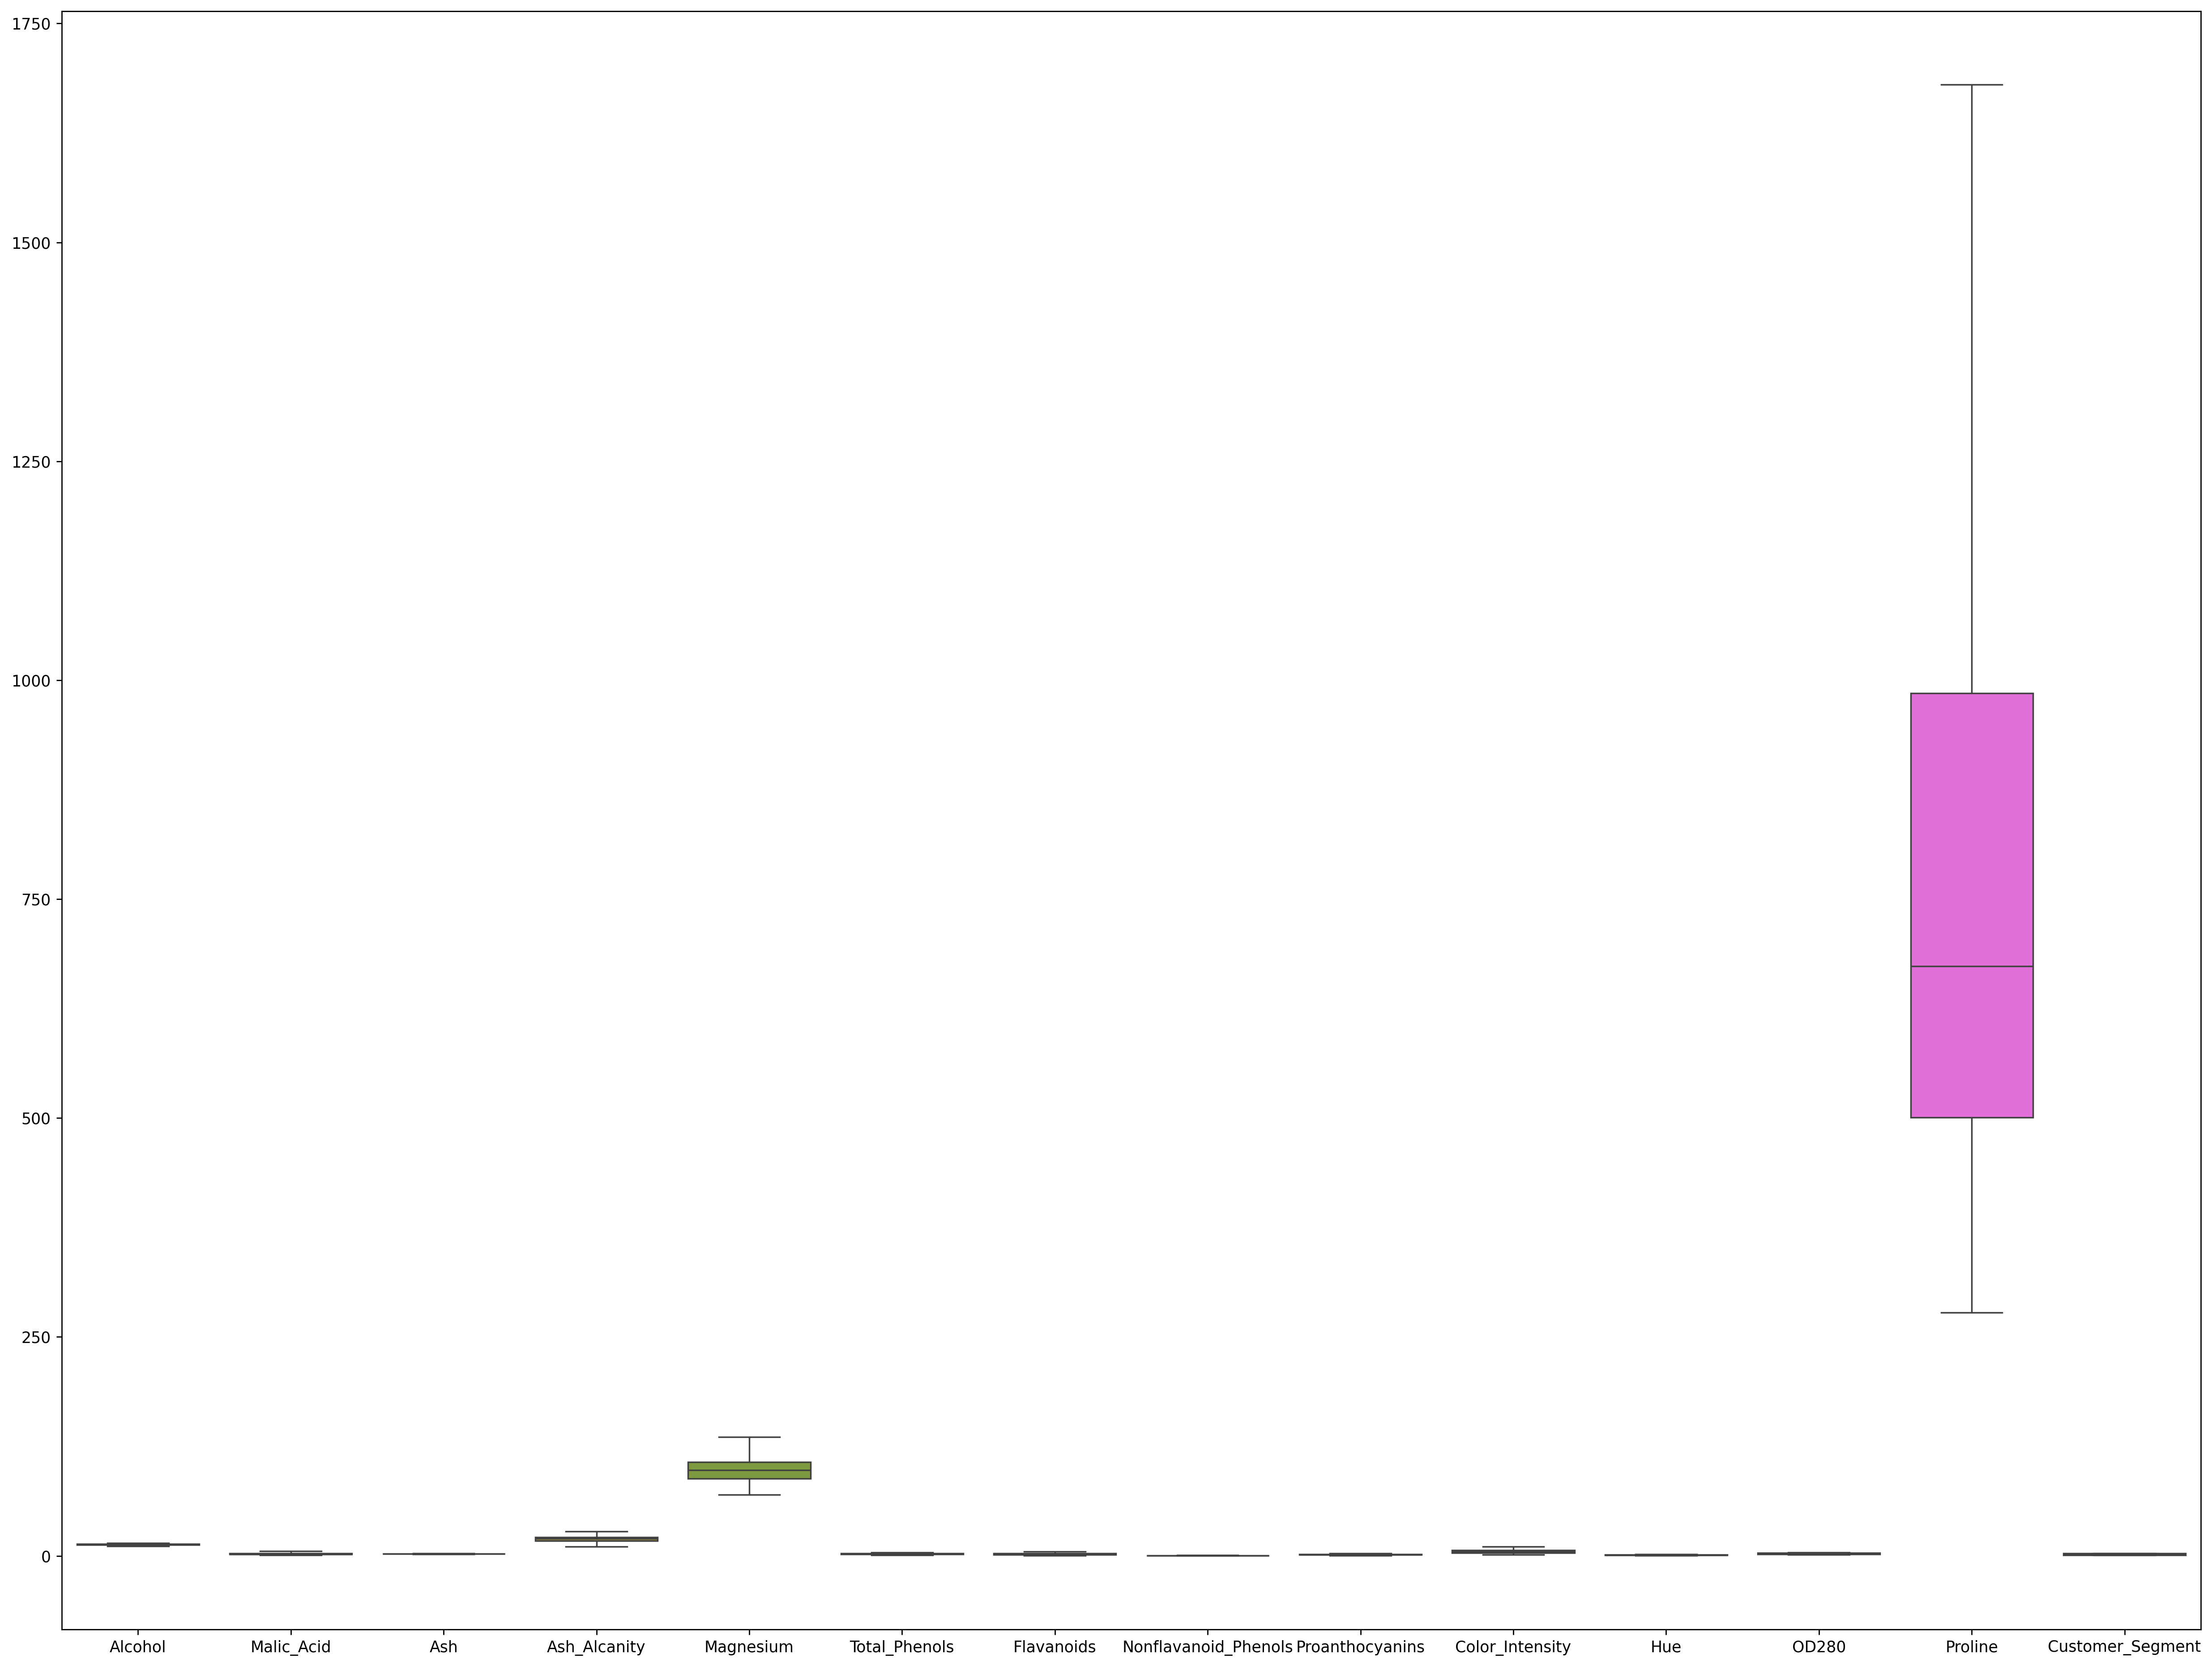

In [19]:
# cross checking the outliers
plt.rcParams['figure.figsize']=(20, 15)
sns.boxplot(df)
plt.tight_layout()

In [20]:
# outliers has been capped

# DATA TRANSFORMATION

In [21]:
# there is no categorical column so I don't need to preform encoding
# there is no distance related calculation in the algorithm and dataset is very small in size so I am not performing feature scalling

# FEATURE SCALLING

In [22]:
# I am not performing feature engineering right now just to see the performance of the model without doing feature scalling

# MODEL BUILDING

In [23]:
# defining x and y variables
x = df.drop(columns='Customer_Segment')
y = df['Customer_Segment']
x

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.7100,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.7800,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.3600,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.9500,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.5900,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.3025,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.9100,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.2800,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.5900,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [24]:
y

,Customer_Segment
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
173,3.0
174,3.0
175,3.0
176,3.0


In [69]:
# splitting data into training and testing part
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.80, random_state=42)
xtrain

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
158,14.34,1.6800,2.70,25.0,98.0,2.80,1.31,0.53,2.70,10.67,0.57,1.96,660.0
137,12.53,5.3025,2.64,25.0,96.0,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515.0
98,12.37,1.0700,2.10,18.5,88.0,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660.0
159,13.48,1.6700,2.64,22.5,89.0,2.60,1.10,0.52,2.29,10.67,0.57,1.78,620.0
38,13.07,1.5000,2.10,15.5,98.0,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,13.86,1.5100,2.67,25.0,86.0,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410.0
106,12.25,1.7300,2.12,19.0,80.0,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510.0
14,14.38,1.8700,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547.0
92,12.69,1.5300,2.26,20.7,80.0,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495.0


In [26]:
ytrain

,Customer_Segment
158,3.0
137,3.0
98,2.0
159,3.0
38,1.0
...,...
71,2.0
106,2.0
14,1.0
92,2.0


# LET'S COMPARE THE PERFORMACE OF MODELS WITH BOOSTING MODELS

In [27]:
# defining function'
def prediction(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    print(f'training accuracy: {model.score(xtrain, ytrain)}')
    print(f'training accuracy: {model.score(xtest, ytest)}')
    print('--'*30)
    print(classification_report(ytest, ypred))
    print('--'*30)
    print(f'predicted values: {ypred}')

### Decision Tree model

In [28]:
# decision tree model
prediction(DecisionTreeClassifier())

training accuracy: 1.0
training accuracy: 0.9444444444444444
------------------------------------------------------------
              precision    recall  f1-score   support

         1.0       1.00      0.93      0.96        14
         2.0       0.88      1.00      0.93        14
         3.0       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

------------------------------------------------------------
predicted values: [1. 1. 3. 1. 2. 1. 2. 3. 2. 3. 2. 2. 1. 2. 1. 2. 2. 2. 1. 2. 1. 2. 2. 3.
 3. 3. 2. 2. 2. 1. 1. 2. 3. 1. 1. 1.]


In [29]:
# there is overfitting in the model
# because threre is a difference of more than 3% between training and testing accuracy

## LOGISTIC REGRESSION MODEL

In [30]:
# building model
prediction(LogisticRegression())

training accuracy: 0.9647887323943662
training accuracy: 0.9722222222222222
------------------------------------------------------------
              precision    recall  f1-score   support

         1.0       1.00      0.93      0.96        14
         2.0       0.93      1.00      0.97        14
         3.0       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36

------------------------------------------------------------
predicted values: [1. 1. 3. 1. 2. 1. 2. 3. 2. 3. 2. 3. 1. 2. 1. 2. 2. 2. 1. 2. 1. 2. 2. 3.
 3. 3. 2. 2. 2. 1. 1. 2. 3. 1. 1. 1.]


In [31]:
# logistic regression is performing very well on this dataset
# there is no overfitting

# RANDOM FOREST

In [32]:
prediction(RandomForestClassifier())

training accuracy: 1.0
training accuracy: 1.0
------------------------------------------------------------
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        14
         2.0       1.00      1.00      1.00        14
         3.0       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

------------------------------------------------------------
predicted values: [1. 1. 3. 1. 2. 1. 2. 3. 2. 3. 1. 3. 1. 2. 1. 2. 2. 2. 1. 2. 1. 2. 2. 3.
 3. 3. 2. 2. 2. 1. 1. 2. 3. 1. 1. 1.]


In [33]:
# it is performing the best
# there is no overfitting

# GRADIENT BOOSTING algorithm

In [34]:
prediction(GradientBoostingClassifier())

training accuracy: 1.0
training accuracy: 0.9444444444444444
------------------------------------------------------------
              precision    recall  f1-score   support

         1.0       0.93      1.00      0.97        14
         2.0       0.93      0.93      0.93        14
         3.0       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

------------------------------------------------------------
predicted values: [1. 1. 3. 1. 2. 1. 2. 3. 2. 3. 1. 2. 1. 2. 1. 2. 2. 2. 1. 2. 1. 2. 2. 3.
 3. 3. 2. 1. 2. 1. 1. 2. 3. 1. 1. 1.]


In [35]:
# there is overfitting
# because there is a difference of almost 6% between training and testing accuracy
# this is happening because I didn't selected best parameters while model building like : n_estimators, learninig_rate, max_depth

# HYPERPARAMETER TUNNING FOR GRADIENT BOOSTING

In [36]:
# creating a dictionary of parameters
params = {
    'learning_rate' : [0.2, 0.3, 0.5, 0.6, 0.7],
    'n_estimators' : [90, 100, 110, 120],
    'max_depth' : [3, 4, 5, 6, 7]
}

In [37]:
# grid = GridSearchCV(GradientBoostingClassifier(), param_grid=params, verbose=1)
# grid.fit(xtrain, ytrain)

In [38]:
# asking for the best parameters
# grid.best_params_

In [39]:
# building model with the best parameters/
# prediction(GradientBoostingClassifier(learning_rate=0.6, max_depth=3, n_estimators=90))

In [40]:
# I got a generalized model
#now there is no overfitting

# XTREME GRADIENT BOOSTING

In [41]:
df['Customer_Segment'].unique()

array([1., 2., 3.])

I need to convert these labels into 0, 1, 2. because xgboost expect these values to be in the correct order like 0, 1, 2

In [42]:
from  sklearn.preprocessing import LabelEncoder

In [43]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [44]:
# split the data into training and testing part
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.80, random_state=42)

In [45]:
np.unique(y)

array([0, 1, 2])

In [46]:
len(xtrain)

142

In [47]:
len(xtest)

36

In [48]:
len(ytrain)

142

In [49]:
len(ytest)

36

In [50]:
prediction(XGBClassifier())

training accuracy: 1.0
training accuracy: 0.9444444444444444
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.88      1.00      0.93        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

------------------------------------------------------------
predicted values: [0 0 2 0 1 0 1 2 1 2 1 1 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]


In [51]:
# there is overfitting in the model

# HYPERPARAMETER TUNNING

In [54]:
!pip install --upgrade scikit-learn xgboost

In [56]:
xtrain

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
158,14.34,1.6800,2.70,25.0,98.0,2.80,1.31,0.53,2.70,10.67,0.57,1.96,660.0
137,12.53,5.3025,2.64,25.0,96.0,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515.0
98,12.37,1.0700,2.10,18.5,88.0,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660.0
159,13.48,1.6700,2.64,22.5,89.0,2.60,1.10,0.52,2.29,10.67,0.57,1.78,620.0
38,13.07,1.5000,2.10,15.5,98.0,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,13.86,1.5100,2.67,25.0,86.0,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410.0
106,12.25,1.7300,2.12,19.0,80.0,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510.0
14,14.38,1.8700,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547.0
92,12.69,1.5300,2.26,20.7,80.0,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495.0


In [73]:
ytrain

array([2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0,
       1, 0, 2, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 2, 1, 0, 2, 1, 0, 2, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1,
       1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 0, 2, 0, 2, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 2, 2, 2, 1,
       0, 1, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 2, 2, 0, 0, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 2, 0, 1, 1, 0, 1, 1])

In [72]:
xtest

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
19,13.64,3.10,2.56,15.2,116.0,2.70,3.03,0.17,1.66,5.100000,0.96,3.36,845.0
45,14.21,4.04,2.44,18.9,111.0,2.85,2.65,0.30,1.25,5.240000,0.87,3.33,1080.0
140,12.93,2.81,2.70,21.0,96.0,1.54,0.50,0.53,0.75,4.600000,0.77,2.31,600.0
30,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29,2.38,5.700000,1.19,2.71,1285.0
67,12.37,1.17,1.92,19.6,78.0,2.11,2.00,0.27,1.04,4.680000,1.12,3.48,510.0
16,14.30,1.92,2.72,20.0,120.0,2.80,3.14,0.33,1.97,6.200000,1.07,2.65,1280.0
119,12.00,3.43,2.00,19.0,87.0,2.00,1.64,0.37,1.87,1.280000,0.93,3.05,564.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.300000,0.70,1.56,750.0
109,11.61,1.35,2.70,20.0,94.0,2.74,2.92,0.29,2.49,2.650000,0.96,3.26,680.0
141,13.36,2.56,2.35,20.0,89.0,1.40,0.50,0.37,0.64,5.600000,0.70,2.47,780.0


In [70]:
ytest

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0])

In [67]:
!pip install --upgrade scikit-learn

In [75]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Create a dictionary of hyperparameters to tune
params = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.01, 0.1, 1]
}

# Create a GridSearchCV object
grid = GridSearchCV(XGBClassifier(), param_grid=params, verbose=1)

# Fit the GridSearchCV object to the training data
grid.fit(xtrain, ytrain)

# Print the best hyperparameters
print(grid.best_params_)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'